In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('creditcardmarketing.csv')
data

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17995,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17996,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17997,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [3]:
data.columns

Index(['1', 'No', 'Air Miles', 'Letter', 'High', '1.1', 'No.1', 'High.1', '2',
       '1.2', '4', 'No.2', '1160.75', '1669', '877', '1095', '1002'],
      dtype='object')

# Rename the columns

In [4]:
data.columns=['customer_number','offer_accepted','reward','mailer_type','income_level','bank_accounts_open','overdraft_protection','credit_rating','creditcards_held','homes_owned','household_size','own_your_home','average_balance','q1_balance','q2_balance','q3_balance','q4_balance']
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'creditcards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

# Drop index and customer number as they are hidden

In [5]:
data=data.drop(['customer_number'],axis=1)
data

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,creditcards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17995,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17996,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17997,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


# Check null data

In [6]:
pd.DataFrame(data.isna().sum()/len(data))

,0
offer_accepted,0.000000
reward,0.000000
mailer_type,0.000000
income_level,0.000000
bank_accounts_open,0.000000
overdraft_protection,0.000000
credit_rating,0.000000
creditcards_held,0.000000
homes_owned,0.000000
household_size,0.000000


# Decide to fill with the columns' mean value

In [7]:
data['average_balance'] = data['average_balance'].fillna(np.mean(data['average_balance']))
data['q1_balance'] = data['q1_balance'].fillna(np.mean(data['q1_balance']))
data['q2_balance'] = data['q2_balance'].fillna(np.mean(data['q2_balance']))
data['q3_balance'] = data['q3_balance'].fillna(np.mean(data['q3_balance']))
data['q4_balance'] = data['q4_balance'].fillna(np.mean(data['q4_balance']))

In [8]:
# check null again and can move on
pd.DataFrame(data.isnull().sum()/len(data))

,0
offer_accepted,0.0
reward,0.0
mailer_type,0.0
income_level,0.0
bank_accounts_open,0.0
overdraft_protection,0.0
credit_rating,0.0
creditcards_held,0.0
homes_owned,0.0
household_size,0.0


In [9]:
data.dtypes

offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
creditcards_held          int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

# Drop the outliers

In [10]:
data['household_size'].value_counts()

3    5712
4    5542
5    2853
2    2813
1     539
6     538
9       1
8       1
Name: household_size, dtype: int64

In [11]:
data=data[~data['household_size'].isin([8,9])]


In [12]:
data=data.reset_index(drop=True)
data

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,creditcards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17993,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17994,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17995,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [13]:
pd.DataFrame(data.isnull().sum()/len(data))

,0
offer_accepted,0.0
reward,0.0
mailer_type,0.0
income_level,0.0
bank_accounts_open,0.0
overdraft_protection,0.0
credit_rating,0.0
creditcards_held,0.0
homes_owned,0.0
household_size,0.0


# Spilt cat and num data

In [14]:
data_cat = data.select_dtypes(np.object)
data_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,Medium,No,Medium,Yes
1,No,Air Miles,Postcard,High,No,Medium,Yes
2,No,Air Miles,Letter,Medium,No,High,No
3,No,Air Miles,Letter,Medium,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No
...,...,...,...,...,...,...,...
17992,No,Cash Back,Letter,High,No,Low,Yes
17993,No,Cash Back,Letter,High,No,Low,Yes
17994,No,Cash Back,Letter,High,No,Low,No
17995,No,Cash Back,Letter,Medium,No,Medium,Yes


In [15]:
data_num = data.select_dtypes(np.number)
data_num

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,2,5,147.25,39.0,106.0,78.0,366.0
1,2,2,1,2,276.50,367.0,352.0,145.0,242.0
2,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
3,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
4,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...
17992,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17993,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17994,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17995,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [16]:
data_num.describe()

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000
mean,1.255820,1.903595,1.203423,3.498472,940.527453,910.495738,999.421269,1042.035380,810.157426
std,0.472528,0.797018,0.427330,1.113008,350.031957,619.633452,457.069953,553.099368,558.586474
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,788.000000,393.000000,664.000000,633.000000,364.000000
50%,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,1.000000,2.000000,1.000000,4.000000,1152.500000,1520.000000,1342.000000,1462.000000,1211.000000
max,3.000000,4.000000,3.000000,6.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


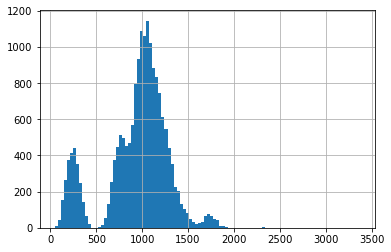

In [17]:
data_num['average_balance'].hist(bins=100)

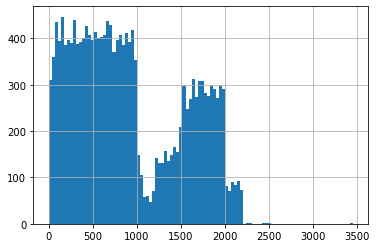

In [18]:
data_num['q1_balance'].hist(bins=100)

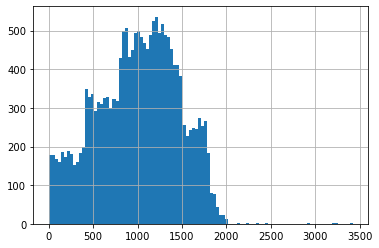

In [19]:
data_num['q2_balance'].hist(bins=100)

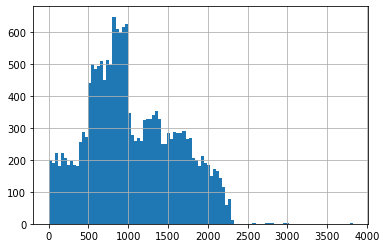

In [20]:
data_num['q3_balance'].hist(bins=100)

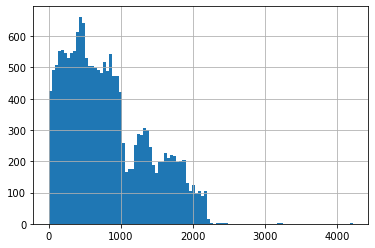

In [21]:
data_num['q4_balance'].hist(bins=100)

In [22]:
# standardscaler num data
from sklearn.preprocessing import StandardScaler

In [23]:
transformer = StandardScaler().fit(data_num)
x_scaled = transformer.transform(data_num)
x_scaled

array([[-0.54140134,  0.12096042,  1.86413074, ..., -1.95472506,
        -1.74301802, -0.79516742],
       [ 1.57493228,  0.12096042, -0.47604511, ..., -1.41649928,
        -1.62187909, -1.0171625 ],
       [ 1.57493228, -1.13375125, -0.47604511, ...,  1.66407758,
         0.13915539, -0.70028243],
       ...,
       [-0.54140134,  0.12096042, -0.47604511, ..., -0.50851675,
         0.23136561,  1.22427163],
       [-0.54140134,  2.63038377,  1.86413074, ..., -0.03592825,
        -0.32008769,  1.44089586],
       [ 1.57493228,  0.12096042, -0.47604511, ...,  0.82829608,
         1.69226486, -0.37087039]])

In [24]:
x_full_scaled=pd.DataFrame(x_scaled,columns=data_num.columns.tolist())
x_full_scaled

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,-0.541401,0.120960,1.864131,1.349110,-2.266363,-1.406509,-1.954725,-1.743018,-0.795167
1,1.574932,0.120960,-0.476045,-1.346364,-1.897101,-0.877149,-1.416499,-1.621879,-1.017162
2,1.574932,-1.133751,-0.476045,0.450618,0.795585,1.077287,1.664078,0.139155,-0.700282
3,-0.541401,0.120960,-0.476045,2.247601,0.772730,1.984300,0.782350,-0.108547,-0.796958
4,-0.541401,1.375672,-0.476045,0.450618,0.497747,1.511426,0.799853,-0.528013,-0.560640
...,...,...,...,...,...,...,...,...,...
17992,-0.541401,-1.133751,-0.476045,1.349110,-2.208510,-1.249960,-2.044429,-1.755674,-0.737878
17993,-0.541401,1.375672,-0.476045,-0.447873,-0.257205,0.118629,-0.130008,-0.179060,-0.492610
17994,-0.541401,0.120960,-0.476045,0.450618,0.419181,0.012111,-0.508517,0.231366,1.224272
17995,-0.541401,2.630384,1.864131,-1.346364,0.233478,-0.459148,-0.035928,-0.320088,1.440896


# Check multicorr

In [25]:
data_corr=data[['bank_accounts_open','creditcards_held','homes_owned','household_size','average_balance','q1_balance','q2_balance','q3_balance','q4_balance']]

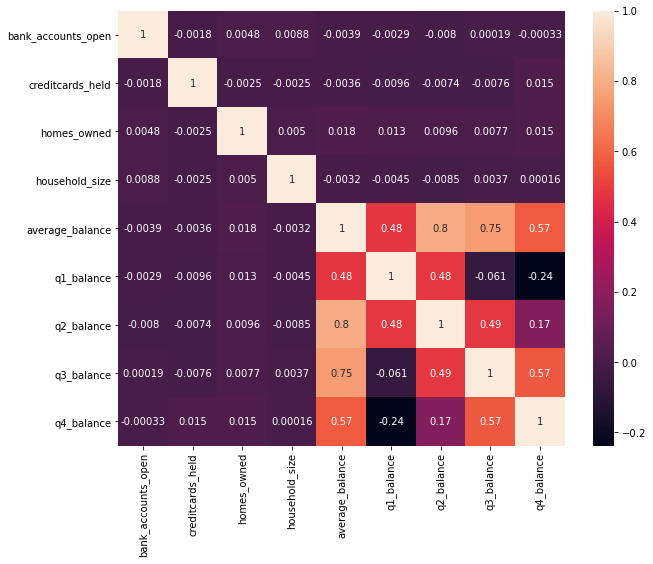

In [26]:
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##### 0.8 is just on the limit, may keep it now

In [27]:
# check cat data if they are needed
data['offer_accepted'].value_counts()

No     16975
Yes     1022
Name: offer_accepted, dtype: int64

In [28]:
data['reward'].value_counts()

Air Miles    6059
Cash Back    5999
Points       5939
Name: reward, dtype: int64

In [29]:
data['mailer_type'].value_counts()

Postcard    9145
Letter      8852
Name: mailer_type, dtype: int64

In [30]:
data['income_level'].value_counts()

Medium    9013
High      4523
Low       4461
Name: income_level, dtype: int64

In [31]:
data['overdraft_protection'].value_counts()

No     15320
Yes     2677
Name: overdraft_protection, dtype: int64

In [32]:
data['credit_rating'].value_counts()

High      6070
Medium    5972
Low       5955
Name: credit_rating, dtype: int64

In [33]:
data['own_your_home'].value_counts()

Yes    11655
No      6342
Name: own_your_home, dtype: int64

# income level and credit rate have ordinal values, do with label encoding

In [34]:
import category_encoders as ce

In [35]:
encoder_income=ce.OrdinalEncoder(cols=['income_level'],return_df=True,mapping=[{'col':'income_level','mapping':{'Low':0,'Medium':1,'High':2}}])

In [36]:
income_trans=encoder_income.fit_transform(data['income_level'])

In [37]:
income_trans

,income_level
0,1
1,2
2,1
3,1
4,1
...,...
17992,2
17993,2
17994,2
17995,1


In [38]:
encoder_rating=ce.OrdinalEncoder(cols=['credit_rating'],return_df=True,mapping=[{'col':'credit_rating','mapping':{'Low':0,'Medium':1,'High':2}}])
rating_trans=encoder_rating.fit_transform(data['credit_rating'])
rating_trans

,credit_rating
0,1
1,1
2,2
3,1
4,2
...,...
17992,0
17993,0
17994,0
17995,1


In [39]:
# settle cat data
data_cat=data_cat.drop(['income_level','credit_rating'],axis=1)

In [40]:
data_cat

,offer_accepted,reward,mailer_type,overdraft_protection,own_your_home
0,No,Air Miles,Letter,No,Yes
1,No,Air Miles,Postcard,No,Yes
2,No,Air Miles,Letter,No,No
3,No,Air Miles,Letter,No,Yes
4,No,Air Miles,Letter,No,No
...,...,...,...,...,...
17992,No,Cash Back,Letter,No,Yes
17993,No,Cash Back,Letter,No,Yes
17994,No,Cash Back,Letter,No,No
17995,No,Cash Back,Letter,No,Yes


# get dummies

In [41]:
cat_encoded=pd.get_dummies(data_cat,drop_first=True)
cat_encoded

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,0,0,0,0,0,1
1,0,0,0,1,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
17992,0,1,0,0,0,1
17993,0,1,0,0,0,1
17994,0,1,0,0,0,0
17995,0,1,0,0,0,1


In [42]:
# concat all data together
data=pd.concat([cat_encoded,income_trans,rating_trans,x_full_scaled],axis=1)
data

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,income_level,credit_rating,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,0,0,0,0,1,1,1,-0.541401,0.120960,1.864131,1.349110,-2.266363,-1.406509,-1.954725,-1.743018,-0.795167
1,0,0,0,1,0,1,2,1,1.574932,0.120960,-0.476045,-1.346364,-1.897101,-0.877149,-1.416499,-1.621879,-1.017162
2,0,0,0,0,0,0,1,2,1.574932,-1.133751,-0.476045,0.450618,0.795585,1.077287,1.664078,0.139155,-0.700282
3,0,0,0,0,0,1,1,1,-0.541401,0.120960,-0.476045,2.247601,0.772730,1.984300,0.782350,-0.108547,-0.796958
4,0,0,0,0,0,0,1,2,-0.541401,1.375672,-0.476045,0.450618,0.497747,1.511426,0.799853,-0.528013,-0.560640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,2,0,-0.541401,-1.133751,-0.476045,1.349110,-2.208510,-1.249960,-2.044429,-1.755674,-0.737878
17993,0,1,0,0,0,1,2,0,-0.541401,1.375672,-0.476045,-0.447873,-0.257205,0.118629,-0.130008,-0.179060,-0.492610
17994,0,1,0,0,0,0,2,0,-0.541401,0.120960,-0.476045,0.450618,0.419181,0.012111,-0.508517,0.231366,1.224272
17995,0,1,0,0,0,1,1,1,-0.541401,2.630384,1.864131,-1.346364,0.233478,-0.459148,-0.035928,-0.320088,1.440896


# X-Y split

In [43]:
y=data['offer_accepted_Yes']
X_reset=data.drop(['offer_accepted_Yes'],axis=1)

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X_reset,y,test_size=0.7,random_state=100)

# Try 1st Round logistic regression

In [46]:
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred_class = logreg.predict(X_test)

In [49]:
metrics.accuracy_score(y_test, y_pred_class)

0.9427686934434037

In [50]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11877
           1       0.00      0.00      0.00       721

    accuracy                           0.94     12598
   macro avg       0.47      0.50      0.49     12598
weighted avg       0.89      0.94      0.91     12598



# Try 1st Round Classifier

In [51]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred=classifier.predict(X_test)

In [53]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11843    34]
 [  714     7]]


In [54]:
accuracy_score(y_test,y_pred)

0.9406254961104937

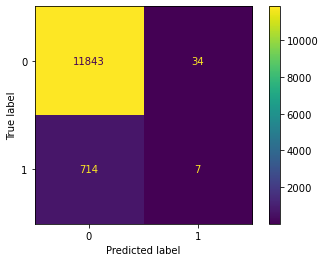

In [55]:
plot_confusion_matrix(classifier, X_test, y_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11877
           1       0.17      0.01      0.02       721

    accuracy                           0.94     12598
   macro avg       0.56      0.50      0.49     12598
weighted avg       0.90      0.94      0.91     12598



In [57]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

14.454992856008891

In [58]:
MSE=mean_squared_error(y_test,y_pred)
MSE

0.05937450388950627

In [59]:
RMSE=np.sqrt(MSE)
RMSE

0.24366884062084398

In [60]:
R2=r2_score(y_test,y_pred)
R2

-0.10042685562148379

# Try 2nd Round: drop q1 as it has 0.8 correlation with avg balance and grouping avg balance as 2 groups
### I should have droped avg balance here as I already bucketed into groups

In [61]:
data_num1=data_num.copy()
data_num1

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,2,5,147.25,39.0,106.0,78.0,366.0
1,2,2,1,2,276.50,367.0,352.0,145.0,242.0
2,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
3,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
4,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...
17992,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17993,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17994,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17995,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [62]:
data_num1=data_num1.drop('q2_balance',axis=1)
data_num1

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q3_balance,q4_balance
0,1,2,2,5,147.25,39.0,78.0,366.0
1,2,2,1,2,276.50,367.0,145.0,242.0
2,2,1,1,4,1219.00,1578.0,1119.0,419.0
3,1,2,1,6,1211.00,2140.0,982.0,365.0
4,1,3,1,4,1114.75,1847.0,750.0,497.0
...,...,...,...,...,...,...,...,...
17992,1,1,1,5,167.50,136.0,71.0,398.0
17993,1,3,1,3,850.50,984.0,943.0,535.0
17994,1,2,1,4,1087.25,918.0,1170.0,1494.0
17995,1,4,2,2,1022.25,626.0,865.0,1615.0


In [63]:
data_num1['balance']=np.where(data_num1['average_balance']>=500,1,0)
data_num1

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q3_balance,q4_balance,balance
0,1,2,2,5,147.25,39.0,78.0,366.0,0
1,2,2,1,2,276.50,367.0,145.0,242.0,0
2,2,1,1,4,1219.00,1578.0,1119.0,419.0,1
3,1,2,1,6,1211.00,2140.0,982.0,365.0,1
4,1,3,1,4,1114.75,1847.0,750.0,497.0,1
...,...,...,...,...,...,...,...,...,...
17992,1,1,1,5,167.50,136.0,71.0,398.0,0
17993,1,3,1,3,850.50,984.0,943.0,535.0,1
17994,1,2,1,4,1087.25,918.0,1170.0,1494.0,1
17995,1,4,2,2,1022.25,626.0,865.0,1615.0,1


In [64]:
data_num1['household_size'].value_counts()

3    5712
4    5542
5    2853
2    2813
1     539
6     538
Name: household_size, dtype: int64

In [65]:
data_cat1=cat_encoded.copy()
data_cat1

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,0,0,0,0,0,1
1,0,0,0,1,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
17992,0,1,0,0,0,1
17993,0,1,0,0,0,1
17994,0,1,0,0,0,0
17995,0,1,0,0,0,1


In [66]:
data_cat1=pd.concat([data_cat1,data_num1[['bank_accounts_open','creditcards_held','homes_owned','household_size','balance']]],axis=1)

In [67]:
data_cat1

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,household_size,balance
0,0,0,0,0,0,1,1,2,2,5,0
1,0,0,0,1,0,1,2,2,1,2,0
2,0,0,0,0,0,0,2,1,1,4,1
3,0,0,0,0,0,1,1,2,1,6,1
4,0,0,0,0,0,0,1,3,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,5,0
17993,0,1,0,0,0,1,1,3,1,3,1
17994,0,1,0,0,0,0,1,2,1,4,1
17995,0,1,0,0,0,1,1,4,2,2,1


In [68]:
data_num1=data_num1.drop(columns=['bank_accounts_open','creditcards_held','homes_owned','household_size','balance'],axis=1)
data_num1

,average_balance,q1_balance,q3_balance,q4_balance
0,147.25,39.0,78.0,366.0
1,276.50,367.0,145.0,242.0
2,1219.00,1578.0,1119.0,419.0
3,1211.00,2140.0,982.0,365.0
4,1114.75,1847.0,750.0,497.0
...,...,...,...,...
17992,167.50,136.0,71.0,398.0
17993,850.50,984.0,943.0,535.0
17994,1087.25,918.0,1170.0,1494.0
17995,1022.25,626.0,865.0,1615.0


In [69]:
transformer1 = StandardScaler().fit(data_num1)
x_scaled1 = transformer1.transform(data_num1)
x_scaled1

array([[-2.26636305, -1.40650888, -1.74301802, -0.79516742],
       [-1.89710079, -0.87714896, -1.62187909, -1.0171625 ],
       [ 0.79558531,  1.07728659,  0.13915539, -0.70028243],
       ...,
       [ 0.41918065,  0.01211114,  0.23136561,  1.22427163],
       [ 0.23347816, -0.45914829, -0.32008769,  1.44089586],
       [ 0.32990061, -1.04176698,  1.69226486, -0.37087039]])

In [70]:
x_full_scaled1=pd.DataFrame(x_scaled1,columns=data_num1.columns.tolist())
x_full_scaled1

,average_balance,q1_balance,q3_balance,q4_balance
0,-2.266363,-1.406509,-1.743018,-0.795167
1,-1.897101,-0.877149,-1.621879,-1.017162
2,0.795585,1.077287,0.139155,-0.700282
3,0.772730,1.984300,-0.108547,-0.796958
4,0.497747,1.511426,-0.528013,-0.560640
...,...,...,...,...
17992,-2.208510,-1.249960,-1.755674,-0.737878
17993,-0.257205,0.118629,-0.179060,-0.492610
17994,0.419181,0.012111,0.231366,1.224272
17995,0.233478,-0.459148,-0.320088,1.440896


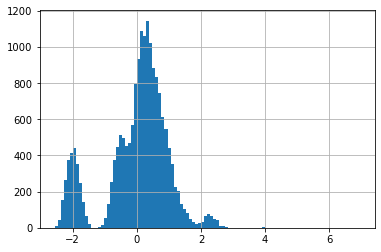

In [71]:
x_full_scaled1['average_balance'].hist(bins=100)

In [72]:
data1=pd.concat([data_cat1,income_trans,rating_trans,x_full_scaled1],axis=1)
data1

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,household_size,balance,income_level,credit_rating,average_balance,q1_balance,q3_balance,q4_balance
0,0,0,0,0,0,1,1,2,2,5,0,1,1,-2.266363,-1.406509,-1.743018,-0.795167
1,0,0,0,1,0,1,2,2,1,2,0,2,1,-1.897101,-0.877149,-1.621879,-1.017162
2,0,0,0,0,0,0,2,1,1,4,1,1,2,0.795585,1.077287,0.139155,-0.700282
3,0,0,0,0,0,1,1,2,1,6,1,1,1,0.772730,1.984300,-0.108547,-0.796958
4,0,0,0,0,0,0,1,3,1,4,1,1,2,0.497747,1.511426,-0.528013,-0.560640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,5,0,2,0,-2.208510,-1.249960,-1.755674,-0.737878
17993,0,1,0,0,0,1,1,3,1,3,1,2,0,-0.257205,0.118629,-0.179060,-0.492610
17994,0,1,0,0,0,0,1,2,1,4,1,2,0,0.419181,0.012111,0.231366,1.224272
17995,0,1,0,0,0,1,1,4,2,2,1,1,1,0.233478,-0.459148,-0.320088,1.440896


In [73]:
y1=data['offer_accepted_Yes']
X_reset1=data1.drop(['offer_accepted_Yes'],axis=1)

# Undersampler data: because we have really less yes and data is not balanced

In [74]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

In [75]:
X_rus, y_rus = rus.fit_sample(X_reset1, y1)

In [76]:
y.value_counts()

0    16975
1     1022
Name: offer_accepted_Yes, dtype: int64

In [77]:
y_rus.value_counts()

1    1022
0    1022
Name: offer_accepted_Yes, dtype: int64

In [78]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_rus,y_rus,test_size=0.7,random_state=100)

# Try 2nd Round logistic regression

In [79]:
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)

LogisticRegression()

In [80]:
y_pred_class1 = logreg.predict(X_test1)

In [81]:
metrics.accuracy_score(y_test1, y_pred_class1)

0.4975541579315164

In [82]:
print(classification_report(y_test1, y_pred_class1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       712
           1       0.00      0.00      0.00       719

    accuracy                           0.50      1431
   macro avg       0.25      0.50      0.33      1431
weighted avg       0.25      0.50      0.33      1431



# Try 2nd Round Classifier

In [83]:
classifier1=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier1.fit(X_train1,y_train1)
y_pred1=classifier1.predict(X_test1)

In [84]:
cm1=confusion_matrix(y_test1,y_pred1)
print(cm1)

[[410 302]
 [280 439]]


In [85]:
accuracy_score(y_test1,y_pred1)

0.5932914046121593

In [86]:
MAE=mean_absolute_error(y_test1,y_pred1)
MAE

50.10621942697414

In [87]:
MSE=mean_squared_error(y_test1,y_pred1)
MSE

0.40670859538784065

In [88]:
RMSE=np.sqrt(MSE)
RMSE

0.6377370895501066

In [89]:
R2=r2_score(y_test1,y_pred1)
R2

-0.6268733103092623

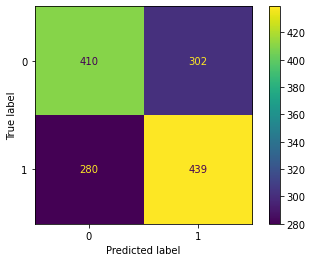

In [90]:
plot_confusion_matrix(classifier1, X_test1, y_test1)

In [91]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58       712
           1       0.59      0.61      0.60       719

    accuracy                           0.59      1431
   macro avg       0.59      0.59      0.59      1431
weighted avg       0.59      0.59      0.59      1431



# Try 3rd Round: divide into 3 groups for avg balance, drop household size and quarters balance

In [92]:
data_cat2=data_cat1.copy()

In [93]:
data_cat2=data_cat2.drop('balance',axis=1)
data_cat2

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,household_size
0,0,0,0,0,0,1,1,2,2,5
1,0,0,0,1,0,1,2,2,1,2
2,0,0,0,0,0,0,2,1,1,4
3,0,0,0,0,0,1,1,2,1,6
4,0,0,0,0,0,0,1,3,1,4
...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,5
17993,0,1,0,0,0,1,1,3,1,3
17994,0,1,0,0,0,0,1,2,1,4
17995,0,1,0,0,0,1,1,4,2,2


In [94]:
data_num2=data_num1.copy()
data_num2

,average_balance,q1_balance,q3_balance,q4_balance
0,147.25,39.0,78.0,366.0
1,276.50,367.0,145.0,242.0
2,1219.00,1578.0,1119.0,419.0
3,1211.00,2140.0,982.0,365.0
4,1114.75,1847.0,750.0,497.0
...,...,...,...,...
17992,167.50,136.0,71.0,398.0
17993,850.50,984.0,943.0,535.0
17994,1087.25,918.0,1170.0,1494.0
17995,1022.25,626.0,865.0,1615.0


In [95]:
data_num2=data_num2.drop(columns=['q1_balance','q3_balance','q4_balance'],axis=1)
data_num2

,average_balance
0,147.25
1,276.50
2,1219.00
3,1211.00
4,1114.75
...,...
17992,167.50
17993,850.50
17994,1087.25
17995,1022.25


In [96]:
def binning(x):
    if x > 1500:
        return '3'
    elif x >= 500:
        return '2'
    else:
        return '1'

In [97]:
data_num2['balance1']=data_num2['average_balance'].apply(binning)

In [98]:
data_num2

,average_balance,balance1
0,147.25,1
1,276.50,1
2,1219.00,2
3,1211.00,2
4,1114.75,2
...,...,...
17992,167.50,1
17993,850.50,2
17994,1087.25,2
17995,1022.25,2


In [99]:
data_cat2=pd.concat([data_cat2,data_num2['balance1']],axis=1)
data_cat2

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,household_size,balance1
0,0,0,0,0,0,1,1,2,2,5,1
1,0,0,0,1,0,1,2,2,1,2,1
2,0,0,0,0,0,0,2,1,1,4,2
3,0,0,0,0,0,1,1,2,1,6,2
4,0,0,0,0,0,0,1,3,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,5,1
17993,0,1,0,0,0,1,1,3,1,3,2
17994,0,1,0,0,0,0,1,2,1,4,2
17995,0,1,0,0,0,1,1,4,2,2,2


In [100]:
data_cat2=data_cat2.drop('household_size',axis=1)
data_cat2

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,balance1
0,0,0,0,0,0,1,1,2,2,1
1,0,0,0,1,0,1,2,2,1,1
2,0,0,0,0,0,0,2,1,1,2
3,0,0,0,0,0,1,1,2,1,2
4,0,0,0,0,0,0,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,1
17993,0,1,0,0,0,1,1,3,1,2
17994,0,1,0,0,0,0,1,2,1,2
17995,0,1,0,0,0,1,1,4,2,2


In [101]:
data_num2=data_num2.drop('balance1',axis=1)
data_num2

,average_balance
0,147.25
1,276.50
2,1219.00
3,1211.00
4,1114.75
...,...
17992,167.50
17993,850.50
17994,1087.25
17995,1022.25


In [102]:
transformer2 = StandardScaler().fit(data_num2)
x_scaled2 = transformer2.transform(data_num2)
x_scaled2

array([[-2.26636305],
       [-1.89710079],
       [ 0.79558531],
       ...,
       [ 0.41918065],
       [ 0.23347816],
       [ 0.32990061]])

In [103]:
x_full_scaled2=pd.DataFrame(x_scaled2,columns=data_num2.columns.tolist())
x_full_scaled2

,average_balance
0,-2.266363
1,-1.897101
2,0.795585
3,0.772730
4,0.497747
...,...
17992,-2.208510
17993,-0.257205
17994,0.419181
17995,0.233478


In [104]:
data2=pd.concat([data_cat2,income_trans,rating_trans,x_full_scaled2],axis=1)
data2

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,balance1,income_level,credit_rating,average_balance
0,0,0,0,0,0,1,1,2,2,1,1,1,-2.266363
1,0,0,0,1,0,1,2,2,1,1,2,1,-1.897101
2,0,0,0,0,0,0,2,1,1,2,1,2,0.795585
3,0,0,0,0,0,1,1,2,1,2,1,1,0.772730
4,0,0,0,0,0,0,1,3,1,2,1,2,0.497747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,1,2,0,-2.208510
17993,0,1,0,0,0,1,1,3,1,2,2,0,-0.257205
17994,0,1,0,0,0,0,1,2,1,2,2,0,0.419181
17995,0,1,0,0,0,1,1,4,2,2,1,1,0.233478


In [105]:
y2=data['offer_accepted_Yes']
X_reset2=data2.drop(['offer_accepted_Yes'],axis=1)

In [106]:
rus2 = RandomUnderSampler()

In [107]:
X_rus2, y_rus2 = rus2.fit_sample(X_reset2, y2)

In [108]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_rus2,y_rus2,test_size=0.5,random_state=100)

# Try 3rd Round logistics regression

In [109]:
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train2)

LogisticRegression()

In [110]:
y_pred_class2 = logreg2.predict(X_test2)

In [111]:
metrics.accuracy_score(y_test2, y_pred_class2)

0.6839530332681018

In [112]:
print(classification_report(y_test2, y_pred_class2))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       515
           1       0.67      0.71      0.69       507

    accuracy                           0.68      1022
   macro avg       0.68      0.68      0.68      1022
weighted avg       0.68      0.68      0.68      1022



# Try 3rd Round Classifier

In [113]:
classifier2=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier2.fit(X_train2,y_train2)
y_pred2=classifier2.predict(X_test2)

In [114]:
cm2=confusion_matrix(y_test2,y_pred2)
print(cm2)

[[317 198]
 [182 325]]


In [115]:
accuracy_score(y_test2,y_pred2)

0.6281800391389433

In [116]:
MAE=mean_absolute_error(y_test2,y_pred2)
MAE

45.60469667318982

In [117]:
MSE=mean_squared_error(y_test2,y_pred2)
MSE

0.37181996086105673

In [118]:
RMSE=np.sqrt(MSE)
RMSE

0.6097704165184277

In [119]:
R2=r2_score(y_test2,y_pred2)
R2

-0.48737098102296006

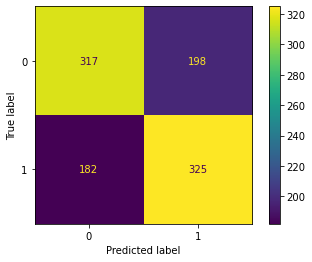

In [120]:
plot_confusion_matrix(classifier2, X_test2, y_test2)

In [121]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       515
           1       0.62      0.64      0.63       507

    accuracy                           0.63      1022
   macro avg       0.63      0.63      0.63      1022
weighted avg       0.63      0.63      0.63      1022



# Try Decision Tree

In [122]:
classifier2_tree = DecisionTreeClassifier()
classifier2_tree.fit(X_train2,y_train2)
y_pred2_tree=classifier2_tree.predict(X_test2)

In [123]:
accuracy_score(y_test2,y_pred2_tree)

0.586105675146771

In [124]:
R2=r2_score(y_test2,y_pred2)
R2

-0.48737098102296006

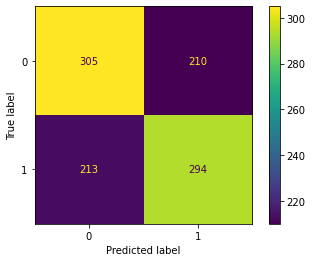

In [125]:
plot_confusion_matrix(classifier2_tree, X_test2, y_test2)

In [126]:
print(classification_report(y_test2, y_pred2_tree))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       515
           1       0.58      0.58      0.58       507

    accuracy                           0.59      1022
   macro avg       0.59      0.59      0.59      1022
weighted avg       0.59      0.59      0.59      1022



# Try 4th Round: try undersampling using tomeklinks

In [127]:
from imblearn.under_sampling import TomekLinks

In [128]:
tl2 = TomekLinks('majority')
X_tl2, y_tl2 = tl2.fit_sample(X_reset2, y2)

In [129]:
y_tl2.value_counts()

0    16420
1     1022
Name: offer_accepted_Yes, dtype: int64

In [130]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X_tl2, y_tl2,test_size=0.5,random_state=100)

# Try 4th Round logistics regression

In [131]:
logreg3 = LogisticRegression()
logreg3.fit(X_train3, y_train3)

LogisticRegression()

In [132]:
y_pred_class3 = logreg3.predict(X_test3)

In [133]:
metrics.accuracy_score(y_test3, y_pred_class3)

0.9433551198257081

In [134]:
print(classification_report(y_test3, y_pred_class3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8227
           1       0.00      0.00      0.00       494

    accuracy                           0.94      8721
   macro avg       0.47      0.50      0.49      8721
weighted avg       0.89      0.94      0.92      8721



# Try 4th Round Classifier

In [135]:
classifier3=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier3.fit(X_train3,y_train3)
y_pred3=classifier3.predict(X_test3)

In [136]:
cm3=confusion_matrix(y_test3,y_pred3)
print(cm3)

[[8083  144]
 [ 463   31]]


In [137]:
accuracy_score(y_test3,y_pred3)

0.9303978901502121

In [138]:
MAE=mean_absolute_error(y_test3,y_pred3)
MAE

13.55452356381149

In [139]:
MSE=mean_squared_error(y_test3,y_pred3)
MSE

0.06960210984978787

In [140]:
RMSE=np.sqrt(MSE)
RMSE

0.263822117817646

In [141]:
R2=r2_score(y_test3,y_pred3)
R2

-0.30252639059008324

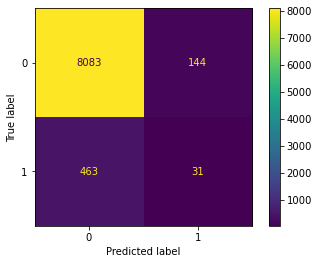

In [142]:
plot_confusion_matrix(classifier3, X_test3, y_test3)

In [143]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8227
           1       0.18      0.06      0.09       494

    accuracy                           0.93      8721
   macro avg       0.56      0.52      0.53      8721
weighted avg       0.90      0.93      0.91      8721



In [144]:
scores = []
for i in range(2,50):
    model = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    model.fit(X_train3, y_train3)
    scores.append(model.score(X_test3, y_test3))

Text(0, 0.5, 'R2')

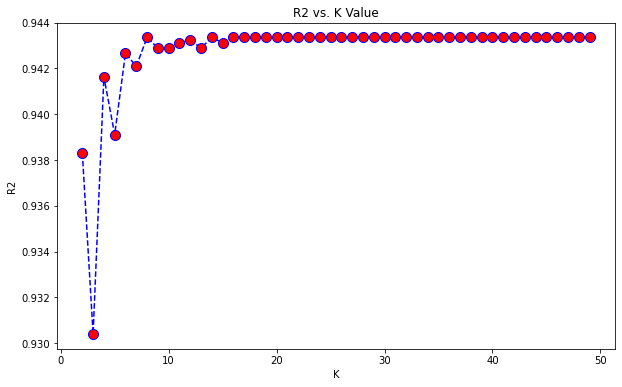

In [145]:
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

# Try Decision Tree

In [146]:
classifier3_tree = DecisionTreeClassifier()
classifier3_tree.fit(X_train3,y_train3)
y_pred3_tree=classifier3_tree.predict(X_test3)

In [147]:
accuracy_score(y_test3,y_pred3_tree)

0.8938195161105378

In [148]:
R2=r2_score(y_test3,y_pred3)
R2

-0.30252639059008324

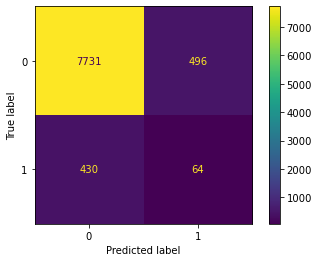

In [149]:
plot_confusion_matrix(classifier3_tree, X_test3, y_test3)

In [150]:
print(classification_report(y_test3, y_pred3_tree))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8227
           1       0.11      0.13      0.12       494

    accuracy                           0.89      8721
   macro avg       0.53      0.53      0.53      8721
weighted avg       0.90      0.89      0.90      8721



# Try 5th Round: try SMOTE

In [151]:
from imblearn.over_sampling import SMOTE

In [152]:
smote = SMOTE()
X_sm4, y_sm4 = smote.fit_sample(X_reset2, y2)

In [153]:
y_sm4.value_counts()

1    16975
0    16975
Name: offer_accepted_Yes, dtype: int64

In [154]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X_sm4, y_sm4,test_size=0.5,random_state=100)

# Try 5th Round logistics regression

In [155]:
logreg4 = LogisticRegression()
logreg4.fit(X_train4, y_train4)

LogisticRegression()

In [156]:
y_pred_class4 = logreg4.predict(X_test4)

In [157]:
metrics.accuracy_score(y_test4, y_pred_class4)

0.7339027982326951

In [158]:
print(classification_report(y_test4, y_pred_class4))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      8507
           1       0.72      0.75      0.74      8468

    accuracy                           0.73     16975
   macro avg       0.73      0.73      0.73     16975
weighted avg       0.73      0.73      0.73     16975



# Try 5th Round Classifier

In [159]:
classifier4=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier4.fit(X_train4,y_train4)
y_pred4=classifier4.predict(X_test4)

In [160]:
cm4=confusion_matrix(y_test4,y_pred4)
print(cm4)

[[6472 2035]
 [ 779 7689]]


In [161]:
accuracy_score(y_test4,y_pred4)

0.8342268041237113

In [162]:
MAE=mean_absolute_error(y_test4,y_pred4)
MAE

11.822091310751105

In [163]:
MSE=mean_squared_error(y_test4,y_pred4)
MSE

0.16577319587628866

In [164]:
RMSE=np.sqrt(MSE)
RMSE

0.4071525461989507

In [165]:
R2=r2_score(y_test4,y_pred4)
R2

0.33690371634818617

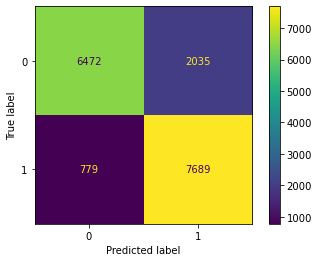

In [166]:
plot_confusion_matrix(classifier4, X_test4, y_test4)

In [167]:
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      8507
           1       0.79      0.91      0.85      8468

    accuracy                           0.83     16975
   macro avg       0.84      0.83      0.83     16975
weighted avg       0.84      0.83      0.83     16975



In [168]:
scores = []
for i in range(2,50):
    model = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    model.fit(X_train4, y_train4)
    scores.append(model.score(X_test4, y_test4))

Text(0, 0.5, 'R2')

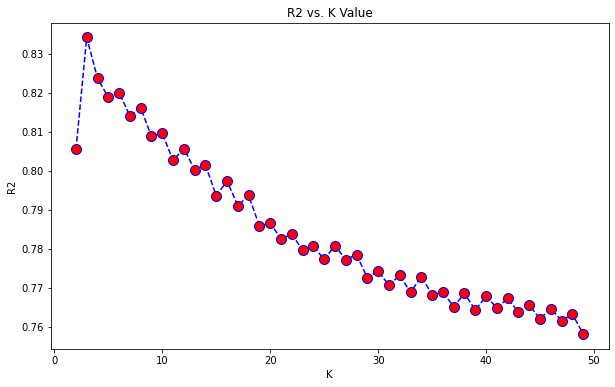

In [169]:
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

# Try 6th Round: drop all balances but keep q1 balance

In [170]:
data_num5=data_num1.copy()
data_num5

,average_balance,q1_balance,q3_balance,q4_balance
0,147.25,39.0,78.0,366.0
1,276.50,367.0,145.0,242.0
2,1219.00,1578.0,1119.0,419.0
3,1211.00,2140.0,982.0,365.0
4,1114.75,1847.0,750.0,497.0
...,...,...,...,...
17992,167.50,136.0,71.0,398.0
17993,850.50,984.0,943.0,535.0
17994,1087.25,918.0,1170.0,1494.0
17995,1022.25,626.0,865.0,1615.0


In [171]:
data_num5=data_num5.drop(columns=['average_balance','q3_balance','q4_balance'],axis=1)
data_num5

,q1_balance
0,39.0
1,367.0
2,1578.0
3,2140.0
4,1847.0
...,...
17992,136.0
17993,984.0
17994,918.0
17995,626.0


In [172]:
transformer5 = StandardScaler().fit(data_num5)
x_scaled5 = transformer5.transform(data_num5)
x_scaled5

array([[-1.40650888],
       [-0.87714896],
       [ 1.07728659],
       ...,
       [ 0.01211114],
       [-0.45914829],
       [-1.04176698]])

In [173]:
x_full_scaled5=pd.DataFrame(x_scaled5,columns=data_num5.columns.tolist())
x_full_scaled5

,q1_balance
0,-1.406509
1,-0.877149
2,1.077287
3,1.984300
4,1.511426
...,...
17992,-1.249960
17993,0.118629
17994,0.012111
17995,-0.459148


In [174]:
data_cat5=data_cat1.copy()
data_cat5

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,household_size,balance
0,0,0,0,0,0,1,1,2,2,5,0
1,0,0,0,1,0,1,2,2,1,2,0
2,0,0,0,0,0,0,2,1,1,4,1
3,0,0,0,0,0,1,1,2,1,6,1
4,0,0,0,0,0,0,1,3,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,5,0
17993,0,1,0,0,0,1,1,3,1,3,1
17994,0,1,0,0,0,0,1,2,1,4,1
17995,0,1,0,0,0,1,1,4,2,2,1


In [175]:
data_cat5=data_cat5.drop(columns=['household_size','balance'],axis=1)
data_cat5

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned
0,0,0,0,0,0,1,1,2,2
1,0,0,0,1,0,1,2,2,1
2,0,0,0,0,0,0,2,1,1
3,0,0,0,0,0,1,1,2,1
4,0,0,0,0,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1
17993,0,1,0,0,0,1,1,3,1
17994,0,1,0,0,0,0,1,2,1
17995,0,1,0,0,0,1,1,4,2


In [176]:
data5=pd.concat([data_cat5,income_trans,rating_trans,x_full_scaled5],axis=1)
data5

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,bank_accounts_open,creditcards_held,homes_owned,income_level,credit_rating,q1_balance
0,0,0,0,0,0,1,1,2,2,1,1,-1.406509
1,0,0,0,1,0,1,2,2,1,2,1,-0.877149
2,0,0,0,0,0,0,2,1,1,1,2,1.077287
3,0,0,0,0,0,1,1,2,1,1,1,1.984300
4,0,0,0,0,0,0,1,3,1,1,2,1.511426
...,...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,1,1,1,2,0,-1.249960
17993,0,1,0,0,0,1,1,3,1,2,0,0.118629
17994,0,1,0,0,0,0,1,2,1,2,0,0.012111
17995,0,1,0,0,0,1,1,4,2,1,1,-0.459148


In [177]:
data_corr5=data5[['offer_accepted_Yes','reward_Cash Back','reward_Points','mailer_type_Postcard','overdraft_protection_Yes','own_your_home_Yes','bank_accounts_open','creditcards_held','homes_owned','income_level','credit_rating']]

# Try to check it there are also some coorelated data in categorical data, but actually not

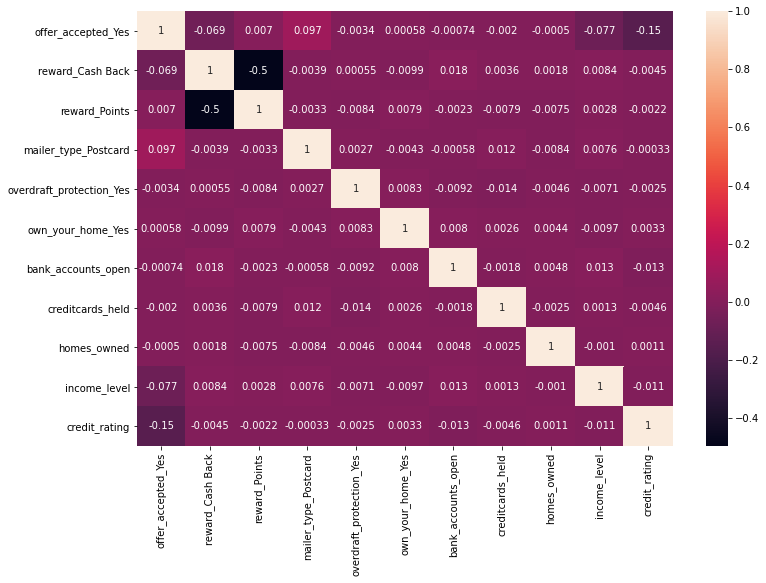

In [178]:
corr_matrix5=data_corr5.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix5, annot=True)
plt.show()

In [179]:
y5=data['offer_accepted_Yes']
X_reset5=data5.drop(['offer_accepted_Yes'],axis=1)

In [180]:
smote = SMOTE()
X_sm5, y_sm5 = smote.fit_sample(X_reset5, y5)

In [181]:
y_sm5.value_counts()

1    16975
0    16975
Name: offer_accepted_Yes, dtype: int64

In [182]:
X_train5,X_test5,y_train5,y_test5=train_test_split(X_sm5, y_sm5,test_size=0.5,random_state=100)

# Try 6th Round logistics regression,with SMOTE

In [183]:
logreg5 = LogisticRegression()
logreg5.fit(X_train5, y_train5)
y_pred_class5 = logreg5.predict(X_test5)

In [184]:
metrics.accuracy_score(y_test5, y_pred_class5)

0.7407363770250368

In [185]:
print(classification_report(y_test5, y_pred_class5))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      8507
           1       0.73      0.76      0.74      8468

    accuracy                           0.74     16975
   macro avg       0.74      0.74      0.74     16975
weighted avg       0.74      0.74      0.74     16975



# Try 6th Round Classifier

In [186]:
classifier5=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier5.fit(X_train5,y_train5)
y_pred5=classifier5.predict(X_test5)

In [187]:
cm5=confusion_matrix(y_test5,y_pred5)
print(cm5)

[[6497 2010]
 [ 763 7705]]


In [188]:
accuracy_score(y_test5,y_pred5)

0.8366421207658321

In [189]:
MAE=mean_absolute_error(y_test5,y_pred5)
MAE

11.580265095729013

In [190]:
MSE=mean_squared_error(y_test5,y_pred5)
MSE

0.1633578792341679

In [191]:
RMSE=np.sqrt(MSE)
RMSE

0.4041755549685902

In [192]:
R2=r2_score(y_test5,y_pred5)
R2

0.346565033913831

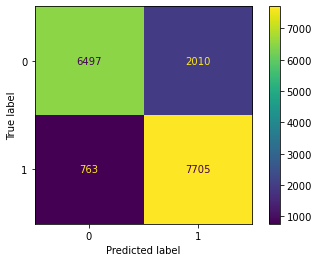

In [193]:
plot_confusion_matrix(classifier5, X_test5, y_test5)

In [194]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      8507
           1       0.79      0.91      0.85      8468

    accuracy                           0.84     16975
   macro avg       0.84      0.84      0.84     16975
weighted avg       0.84      0.84      0.84     16975



In [195]:
scores = []
for i in range(2,50):
    model = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    model.fit(X_train5, y_train5)
    scores.append(model.score(X_test5, y_test5))

Text(0, 0.5, 'R2')

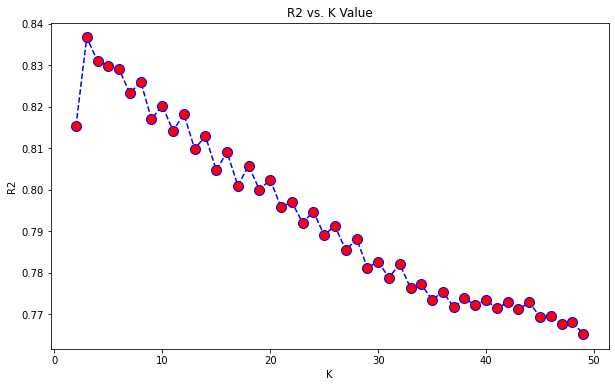

In [196]:
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

# Try Decision Tree

In [197]:
classifier5_tree = DecisionTreeClassifier()
classifier5_tree.fit(X_train5,y_train5)

DecisionTreeClassifier()

In [198]:
y_pred5_tree=classifier5_tree.predict(X_test5)

In [199]:
accuracy_score(y_test5,y_pred5_tree)

0.8107805596465391

In [200]:
R2=r2_score(y_test5,y_pred5_tree)
R2

0.24311824339387855

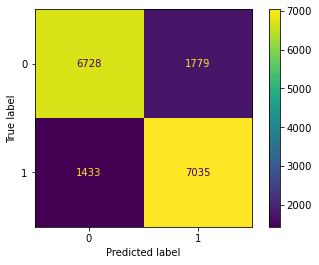

In [201]:
plot_confusion_matrix(classifier5_tree, X_test5, y_test5)

In [202]:
print(classification_report(y_test5, y_pred5_tree))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      8507
           1       0.80      0.83      0.81      8468

    accuracy                           0.81     16975
   macro avg       0.81      0.81      0.81     16975
weighted avg       0.81      0.81      0.81     16975



# Try Naive bayesian classification

In [205]:
mlt=GaussianNB()

In [206]:
mlt.fit(X_train5,y_train5)

GaussianNB()

In [207]:
y_pred5_NB=mlt.predict(X_test5)
accuracy_score(y_test5,y_pred5_NB)

0.7097496318114875

In [208]:
R2=r2_score(y_test5,y_pred5_NB)
R2

-0.16100760112028656

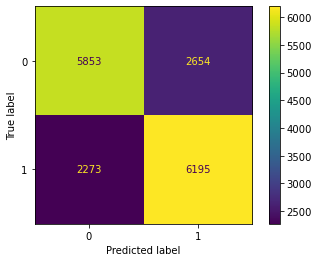

In [209]:
plot_confusion_matrix(mlt, X_test5, y_test5)

In [210]:
print(classification_report(y_test5, y_pred5_NB))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      8507
           1       0.70      0.73      0.72      8468

    accuracy                           0.71     16975
   macro avg       0.71      0.71      0.71     16975
weighted avg       0.71      0.71      0.71     16975



# Making ROC with the last model

In [211]:
fpr, tpr, thresholds = metrics.roc_curve(y_test5, y_pred5)

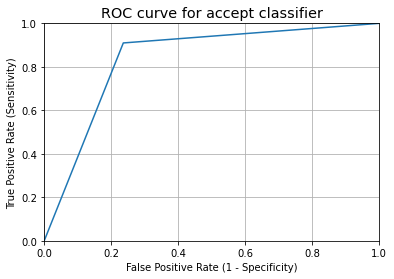

In [212]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for accept classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# In this project, I tried to change/drop features to see if the machine learning can have a better result. As a real case for bank, due to imbalanced data, I think it's more important to reduce/pervent false positive, which it's also the positive predictive value. To have a higher Precision score would be a good evaluate method for the model. In the other words, to help banks to achive more customers.